# Data Wrangling & Analysis: WeRateDogs Twitter Account
>Written by Kieran Shand

## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#wrangling)
    - [Gathering Data](#gather)
    - [Assessing Data](#assess)
        - [Assessment Action Points](#assessments)
    - [Cleaning Data](#clean)
- [Analysis](#analysis)
    - [Rating trends](#trend)
    - [Rating Attributes](#rated)
    - [Rating and audience interaction](#interaction)
- [Conclusion](#conclusion)
- [Limitations](#limit)
- [Sources](#source)

<a id='intro'></a>
## Introduction
In this report, I will be completing a data wrangling and analysis on the tweet archive of WeRateDogs (@dog_rates): *'WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog'.*

WeRateDogs has an international audience with over 8.7 million followers. I will move through 2000+ tweets from the account with effective cleaning to facilitate a later insightful analysis. The data wrangling stage of this report will include 3 core sections: Gathering Data, Assessing Data and Cleaning Data. The later Analysis section of the report will utilise visualisations to answer the questions I have posed the report. 

    1. How have ratings trended over time? 
    2. What makes a highly rated Dog? 
    3. Is there a relationship between ratings and audience interaction?
    
Finally, a well documented conclusion will form a summary of the main findings of the report.

<a id='wrangling'></a>
## Data Wrangling

<a id='gather'></a>
### Gathering Data

**Loading Packages**

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns; sns.set()

**Twitter Archives** 

The WeRateDogs Twitter archive contains basic tweet data for all tweets which include ratings (2356 tweets). I read in the archive using pandas.

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

**Image Predictions** 

Every image in the WeRateDogs Twitter archive has been run through a neural network that can classify breeds of dog. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

Using the requests package and pandas I am able to pull the data into my Notebook.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

image_predictions  = pd.read_csv('image_predictions.tsv', sep='\t')

**Twitter API**

Retweet count and favorite count are two of the notable column omissions from the Twitter Archives, these can be sourced using the Twitter API. I unfortunately was not able to secure access to the API, I have instead read the relevant json file line by line and selected the data I would like to work with, namely, Favourites and Retweets. Using pandas, I create a dataframe with the newly sourced information.

In [4]:
selected_attr = []
with open('tweet-json') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count']})
twitter_api = pd.DataFrame(selected_attr, columns=['tweet_id','favorites','retweets'])

<a id='assess'></a>
### Assessing Data

I will now assess the data both visually and programmatically for quality and tidiness issues. I will note my observations beneath in bullet-point format. This will later serve as a check-mark system when cleaning the data.

In [5]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
twitter_api

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [8]:
all_columns = pd.Series(list(twitter_archive_enhanced) + list(image_predictions) + list(twitter_api))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [9]:
twitter_archive_enhanced[twitter_archive_enhanced.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [10]:
image_predictions[image_predictions['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [11]:
twitter_api[twitter_api.tweet_id.duplicated()]

,tweet_id,favorites,retweets


In [12]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [15]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
twitter_archive_enhanced.query('rating_denominator != 10').count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

In [17]:
twitter_archive_enhanced.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [18]:
twitter_archive_enhanced['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Horace       1
Hanz         1
Comet        1
Dido         1
Snoopy       1
Name: name, Length: 957, dtype: int64

In [19]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
twitter_api.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [21]:
twitter_archive_enhanced['tweet_id'].count() - image_predictions['tweet_id'].count()

281

<a id='assessments'></a>
### Assessment Action Points

From both a visual and programmtic assessment I have identified the below issues which require correction.

#### Data Quality Issues
`twitter_archive_enhanced`
1. timestamp 
    - The time includes excess characters +0000
    - The data type is a string
2. name/ doggo/ floofer/ puppo
    - In various cases (upper/ lower/ sentence case)
    - None values instead of NaN
    - Errors in Dog names (a, an and the)
3. rating_denominator
    - There are 23 Tweet's which do not have a denominator of 10

`image_predictions`
1. p1/ p2/ p3
    - Dog breeds in different cases (upper/ lower/ sentence case)
    - False Dog breed predictions

#### Data Tidiness Issues
`twitter_archive_enhanced`
1. expanded_urls
    - Column will not be used in later analysis
2. in-reply/ retweeted columns 
    - Both columns have low data coverage (78 and 181 rows respectively) 
3. source
    - Column will not be used in later analysis
4. text
    - Column will not be used in later analysis


`image_predictions`
1. jpg_url	
    - Column will not be used in later analysis
2. img_num	
    - Column will not be used in later analysis
3. p1/p2/p3 columns
    - Columns need to be refined


`wrangle_act`
1. Merging Data
    - All 3 tables of data can be merged on tweet id
    - Re-order columns to a logical order

<a id='clean'></a>
### Cleaning Data

Before cleaning data, I make copies of the original tables of data for due diligence

In [22]:
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
twitter_api_clean = twitter_api.copy()

**Define**

**`twitter_archive_enhanced`** 
    1. timestamp includes excess characters +0000 
    2. The data type is a string
    
*Through using .str, I will be able to remove the excess characters, pd.to_dateime will convert the column to a queryable format*.

**Code**

In [23]:
twitter_archive_enhanced_clean['timestamp'] = twitter_archive_enhanced_clean['timestamp'].str[:-15]
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'], format='%Y/%m/%d')

**Test**

In [24]:
twitter_archive_enhanced_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [25]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

**Define**

**`twitter_archive_enhanced`**
- name/ doggo/ floofer/ puppo columns in various cases (upper/ lower/ sentence case)


**`image_predictions`**
- p1/ p2/ p3 Dog breeds in different cases (upper/ lower/ sentence case)

*Using str.lower() will convert data in the said columns to lower case*

**Code**

In [26]:
twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean['name'].str.lower()
twitter_archive_enhanced_clean['doggo'] = twitter_archive_enhanced_clean['doggo'].str.lower()
twitter_archive_enhanced_clean['floofer'] = twitter_archive_enhanced_clean['floofer'].str.lower()
twitter_archive_enhanced_clean['puppo'] = twitter_archive_enhanced_clean['puppo'].str.lower()

In [27]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

**Test**

In [28]:
twitter_archive_enhanced_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1396,699788877217865730,NaN,NaN,2016-02-17,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Nala. She's a Freckled High Brusc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699788877...,12,10,nala,none,none,None,none
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,tessa,none,none,None,none
2095,670764103623966721,NaN,NaN,2015-11-29,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vincent. He's a wild Adderall Cayenne. Sh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670764103...,10,10,vincent,none,none,None,none
1953,673662677122719744,NaN,NaN,2015-12-07,"<a href=""http://twitter.com/download/iphone"" r...",This is Kendall. 12/10 would cuddle the hell o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673662677...,12,10,kendall,none,none,None,none
2351,666049248165822465,NaN,NaN,2015-11-16,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,none,none,none,None,none


In [29]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1021,710269109699739648,https://pbs.twimg.com/media/Cdth_KyWEAEXH3u.jpg,1,pug,0.415495,True,german_shepherd,0.178157,True,labrador_retriever,0.100202,True
1762,826204788643753985,https://pbs.twimg.com/media/C3dEza1WcAAhlNU.jpg,2,labrador_retriever,0.782058,True,golden_retriever,0.156581,True,soft-coated_wheaten_terrier,0.007275,True
1107,723673163800948736,https://pbs.twimg.com/media/CgsA5eFWgAAu0qn.jpg,1,golden_retriever,0.839390,True,labrador_retriever,0.065706,True,hand_blower,0.012941,False
1532,789628658055020548,https://pbs.twimg.com/media/CvVTEnPXYAAWLyL.jpg,1,chow,0.260702,True,cougar,0.088143,False,pomeranian,0.079883,True
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False


**Define**

**`twitter_archive_enhanced`**
- None values instead of NaN


*The .replace function can be used to substitute none values with np.nan*

**Code**

In [30]:
twitter_archive_enhanced_clean.replace(to_replace=[None], value=np.nan, inplace=True)
twitter_archive_enhanced_clean.replace(to_replace='None', value=np.nan, inplace=True)
twitter_archive_enhanced_clean.replace(to_replace='none', value=np.nan, inplace=True)

**Test**

In [31]:
twitter_archive_enhanced_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1874,675135153782571009,NaN,NaN,2015-12-11,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He got locked outside. Damn it...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675135153...,5,10,steven,NaN,NaN,NaN,NaN
2128,670303360680108032,NaN,NaN,2015-11-27,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,NaN,NaN,NaN,NaN
1991,672622327801233409,NaN,NaN,2015-12-04,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327...,12,10,NaN,NaN,NaN,pupper,NaN
312,835264098648616962,NaN,NaN,2017-02-24,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. Her hobbies include being precious ...,NaN,NaN,NaN,https://www.gofundme.com/lolas-life-saving-sur...,12,10,lola,NaN,NaN,NaN,NaN
1404,699370870310113280,NaN,NaN,2016-02-15,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Calbert. He doesn't have enough l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699370870...,11,10,calbert,NaN,NaN,NaN,NaN


**Define**

**`twitter_archive_enhanced`**
- name/ doggo/ floofer/ puppo columns include errors in Dog names (e.g. a, an and the)


*The .replace function can be used to substitute none values with np.nan*

**Code**

In [32]:
twitter_archive_enhanced_clean.replace(to_replace='a', value=np.nan, inplace=True)
twitter_archive_enhanced_clean.replace(to_replace='an', value=np.nan, inplace=True)
twitter_archive_enhanced_clean.replace(to_replace='the', value=np.nan, inplace=True)

**Test**

In [33]:
twitter_archive_enhanced_clean['name'].value_counts()

charlie    12
cooper     11
oliver     11
lucy       11
lola       10
           ..
steve       1
tassy       1
wiggles     1
lacy        1
puff        1
Name: name, Length: 953, dtype: int64

**Define**

**`twitter_archive_enhanced`**
- There are 23 Tweet's which do not have a denominator of 10. Removing these Tweet's would facilitate later analysis.


*Querying rows which have a denominator of 10 allows me to remove non-standard rows*

**Code**

In [34]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.query('rating_denominator == 10')

**Test**

In [35]:
twitter_archive_enhanced_clean.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Define**

**`image_predictions`**
- False Dog breed predictions need to be removed
  

*A function can be used to select True Dog breed predictions in order of confidence*

**Code**

In [36]:
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(0)

image_predictions_clean.apply(breed_confidence, axis=1)
image_predictions_clean['breed'] = breed
image_predictions_clean['confidence'] = confidence

**Test**

In [37]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher,0.560311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,chihuahua,0.323581


**Define**

**`twitter_archive_enhanced`**
- expanded_urls column will not be used in later analysis
- in-reply/ retweeted columns have low data coverage (78 and 181 rows respectively). A reliable analysis cannot be completed based upon this data. 
- source column will not be used in later analysis
- text column will not be used in later analysis


**`image_predictions`**
- jpg_url column will not be used in later analysis
- img_num column will not be used in later analysis
- p1/p2/p3 columns are no longer neccessary to keep 


*The .drop function allows for the removal of columns*

**Code**

In [38]:
twitter_archive_enhanced_clean.drop(columns=['expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'text', 'source'], inplace=True)

In [39]:
image_predictions_clean.drop(columns=['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

**Test**

In [40]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [41]:
image_predictions_clean.columns

Index(['tweet_id', 'breed', 'confidence'], dtype='object')

**Define**

**`twitter_archive_master`**
- All 3 tables of data can be merged on the tweet id        
        
*Tables of data can be combined using .merge*

**Code**

In [42]:
twitter_archive_master = pd.merge(image_predictions_clean, twitter_archive_enhanced_clean,  on='tweet_id')
twitter_archive_master = pd.merge(twitter_archive_master, twitter_api_clean, on='tweet_id')

**Test**

In [43]:
twitter_archive_master

,tweet_id,breed,confidence,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets
0,666020888022790149,welsh_springer_spaniel,0.465074,2015-11-15,8,10,NaN,NaN,NaN,NaN,NaN,2535,532
1,666029285002620928,redbone,0.506826,2015-11-15,7,10,NaN,NaN,NaN,NaN,NaN,132,48
2,666033412701032449,german_shepherd,0.596461,2015-11-15,9,10,NaN,NaN,NaN,NaN,NaN,128,47
3,666044226329800704,rhodesian_ridgeback,0.408143,2015-11-16,6,10,NaN,NaN,NaN,NaN,NaN,311,147
4,666049248165822465,miniature_pinscher,0.560311,2015-11-16,5,10,NaN,NaN,NaN,NaN,NaN,111,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,891327558926688256,basset,0.555712,2017-07-29,12,10,franklin,NaN,NaN,NaN,NaN,41048,9774
2051,891689557279858688,labrador_retriever,0.168086,2017-07-30,13,10,darla,NaN,NaN,NaN,NaN,42908,8964
2052,891815181378084864,chihuahua,0.716012,2017-07-31,12,10,archie,NaN,NaN,NaN,NaN,25461,4328
2053,892177421306343426,chihuahua,0.323581,2017-08-01,13,10,tilly,NaN,NaN,NaN,NaN,33819,6514


**Define**

**`twitter_archive_master`**
- Re-order columns to a logical order

*Re-ordering columns can be simply done using square brackets*

**Code**

In [44]:
twitter_archive_master = twitter_archive_master[['tweet_id', 'timestamp', 'favorites', 'retweets', 'rating_numerator', 'rating_denominator', 
             'name','breed', 'confidence', 'doggo', 'floofer', 'pupper', 'puppo']]

In [45]:
twitter_archive_master.set_index(twitter_archive_master["timestamp"], inplace=True)

**Test**

In [46]:
twitter_archive_master.head()

,tweet_id,timestamp,favorites,retweets,rating_numerator,rating_denominator,name,breed,confidence,doggo,floofer,pupper,puppo
timestamp,,,,,,,,,,,,,
2015-11-15,666020888022790149,2015-11-15,2535,532,8,10,NaN,welsh_springer_spaniel,0.465074,NaN,NaN,NaN,NaN
2015-11-15,666029285002620928,2015-11-15,132,48,7,10,NaN,redbone,0.506826,NaN,NaN,NaN,NaN
2015-11-15,666033412701032449,2015-11-15,128,47,9,10,NaN,german_shepherd,0.596461,NaN,NaN,NaN,NaN
2015-11-16,666044226329800704,2015-11-16,311,147,6,10,NaN,rhodesian_ridgeback,0.408143,NaN,NaN,NaN,NaN
2015-11-16,666049248165822465,2015-11-16,111,41,5,10,NaN,miniature_pinscher,0.560311,NaN,NaN,NaN,NaN


**Define**

**`twitter_archive_master.csv`**

I will now save the cleaned data in a master CSV file

**Code**

In [47]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
## Analysis


<a id='trend'></a>
### Rating Trend

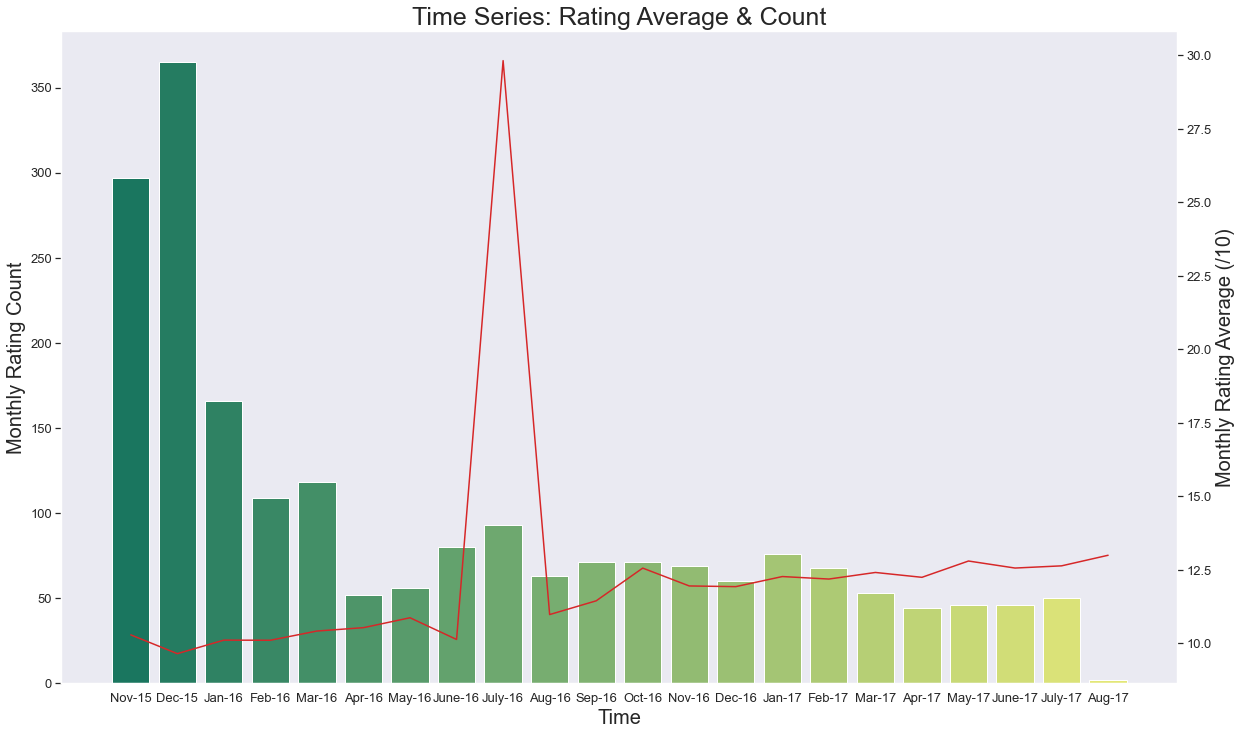

In [48]:
monthly_tweet_count = twitter_archive_master.resample('M')['rating_numerator'].count().reset_index()
monthly_rating_average = twitter_archive_master.resample('M')['rating_numerator'].mean().reset_index()

month = ['Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'June-16', 
         'July-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16','Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'June-17', 
         'July-17', 'Aug-17']


plt.figure(figsize=(20,12))
sns.set_style("dark")
ax1 = sns.barplot(x=month, y='rating_numerator', data=monthly_tweet_count, color = 'tab:green', palette='summer')
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=month, y='rating_numerator', data = monthly_rating_average, sort=False, color='tab:red')
ax1.set_ylabel("Monthly Rating Count", fontsize=20)
ax1.set_xlabel("Time", fontsize=20)
ax2.set_ylabel("Monthly Rating Average (/10)", fontsize=20)
ax1.tick_params(labelsize=13)
ax2.tick_params(labelsize=13)
plt.title('Time Series: Rating Average & Count', fontsize=25)
plt.savefig('monthly_ratings_and_count.png', dpi = 300);

The above visualisation shows a month-to-month time series of tweet count (bar chart) and average rating (line chart). Interestingly, over the time series we observe a downward trend in tweet count while there is an upward trend in average rating. It's important to note that while average rating has increased gradually (with the exception of July-16 as an annomaly), the monthly rating count has dramatically reduced from a peak of 350+ tweets in Dec-15 to just under 60 tweets in July-17. 

Overtime, there is therefore a tendancy of WeRateDogs to tweet less frequently, but to offer higher quality ratings. Perhaps it's quality over quantity...

 <a id='rated'></a>
### Rating Attributes

**The Most Tweeted Dogs**

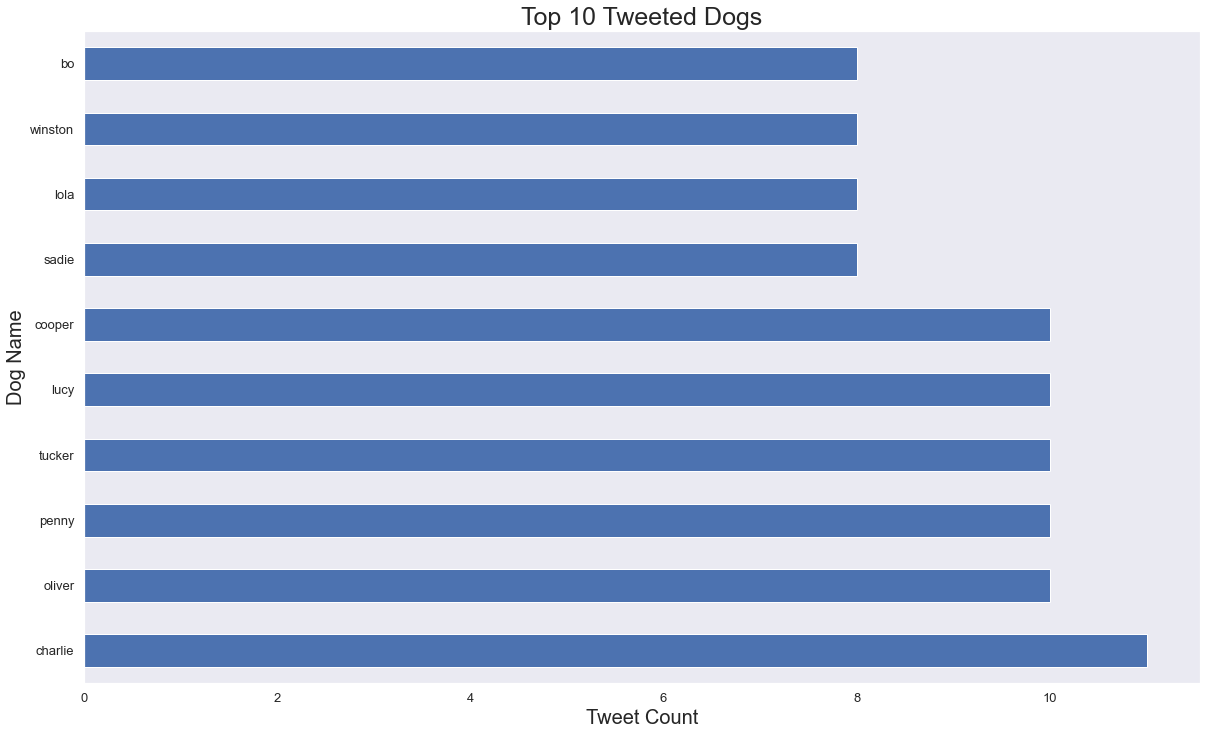

In [49]:
plt.figure(figsize=(20,12))
twitter_archive_master.groupby('name')['tweet_id'].count().sort_values(ascending=False).head(10).plot(kind='barh', color='b')

sns.set_style("dark")
plt.title('Top 10 Tweeted Dogs', fontsize=25)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Tweet Count', fontsize=20)
plt.ylabel('Dog Name', fontsize=20)
plt.savefig('dog_name_10.png', dpi = 300);

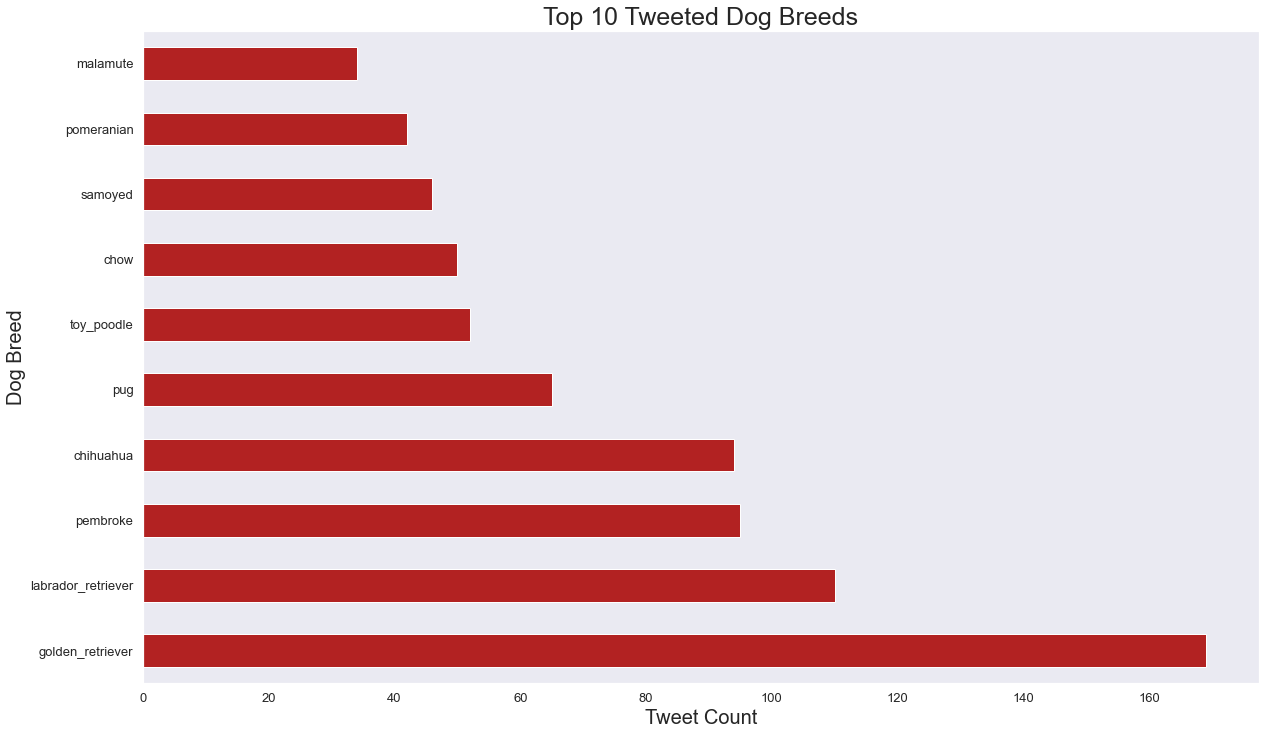

In [50]:
plt.figure(figsize=(20,12))
twitter_archive_master.groupby('breed')['tweet_id'].count().sort_values(ascending=False).head(10).plot(kind='barh', color='firebrick')

sns.set_style("dark")
plt.title('Top 10 Tweeted Dog Breeds', fontsize=25)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Tweet Count', fontsize=20)
plt.ylabel('Dog Breed', fontsize=20)
plt.savefig('dog_breed_10.png', dpi = 300);

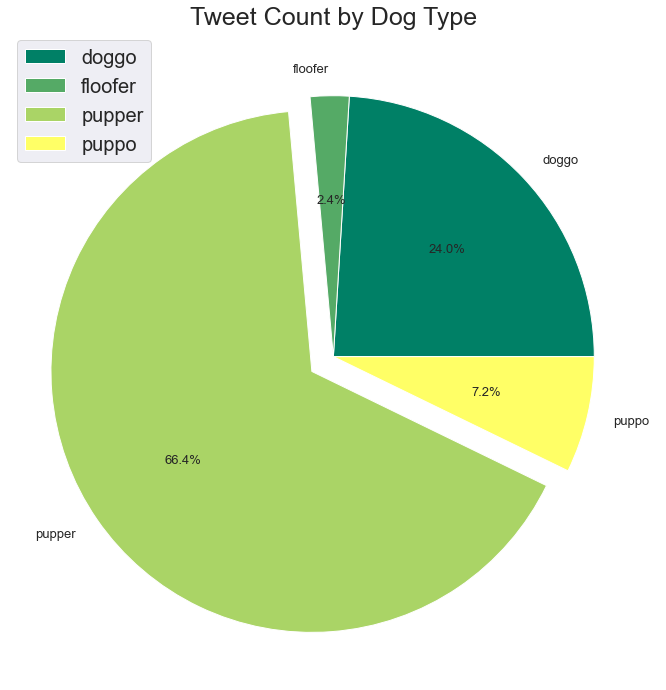

In [51]:
average = twitter_archive_master['rating_numerator'].mean()
doggo = twitter_archive_master[twitter_archive_master['doggo'].notnull()]['rating_numerator'].mean()
floofer = twitter_archive_master[twitter_archive_master['floofer'].notnull()]['rating_numerator'].mean()
pupper = twitter_archive_master[twitter_archive_master['pupper'].notnull()]['rating_numerator'].mean()
puppo = twitter_archive_master[twitter_archive_master['puppo'].notnull()]['rating_numerator'].mean()

average_c = twitter_archive_master['rating_numerator'].count()
doggo_c = twitter_archive_master[twitter_archive_master['doggo'].notnull()]['rating_numerator'].count()
floofer_c = twitter_archive_master[twitter_archive_master['floofer'].notnull()]['rating_numerator'].count()
pupper_c = twitter_archive_master[twitter_archive_master['pupper'].notnull()]['rating_numerator'].count()
puppo_c = twitter_archive_master[twitter_archive_master['puppo'].notnull()]['rating_numerator'].count()

dog_type_aggregates = pd.DataFrame({'dog_type': ['average', 'doggo', 'floofer', 'pupper', 'puppo'], 'rating_average': [average, doggo,floofer,pupper,puppo], 'tweet_count': [average_c, doggo_c, floofer_c, pupper_c, puppo_c]})

dog_type_aggregates2 = dog_type_aggregates[1:5]

labels = dog_type_aggregates2['dog_type']
sizes = dog_type_aggregates2['tweet_count']
explode = (0, 0, 0.1, 0)  

colormap = plt.cm.summer
slices = len(dog_type_aggregates2)
slice_c = colormap(np.linspace(0., 1., slices))

plt.figure(figsize=(12,12))
plt.pie(sizes, labels=labels, textprops={'fontsize': 13}, autopct='%1.1f%%', colors= slice_c, explode=explode,)
plt.title('Tweet Count by Dog Type', fontsize=25)
plt.savefig('duration.png', dpi = 300)
plt.legend(loc='upper left', fontsize=20);

The above horizontal bar charts show the top 10 tweeeted about Dog's and Dog breeds. The pie chart shows the most tweeted about Dog Types (Dogtionary definitions below). Important takeaway are bulleted below:

    - Charlie, (or perhaps several Charlie's) has been the most tweeted about Dog with 11 tweets
    - Golden Retrievers are significantly the most tweeted about Dog breed (169 tweets)
    - Pupper's make-up around 2/3 of all Dog type tweets
        - Puppo's and Floofer's are far rarer, they make-up under 10% (9.6%) of all Dog type tweets combined

Dog Types are part of a wider internet slang called DoggoLingo. DoggoLingo is a fun way to describe Dogs using cutesy spellings and doggy onomatopoeias.
    - Pupper: 'A small Doggo, usually younger. Can be equally, if not more mature than some Doggos'
    - Puppo: 'A transitional phase between Pupper and Doggo. Easily understood as a the Dog equivalent of a teenager'
    - Doggo: 'A big Pupper, usually older. This label does not stop a Doggo from behaving like a Pupper'
    - Floof: 'Any Dog really. However, this label is commonly given to Dogs with seemingly excess fur'

**The Highest & Lowest Rated Dogs**

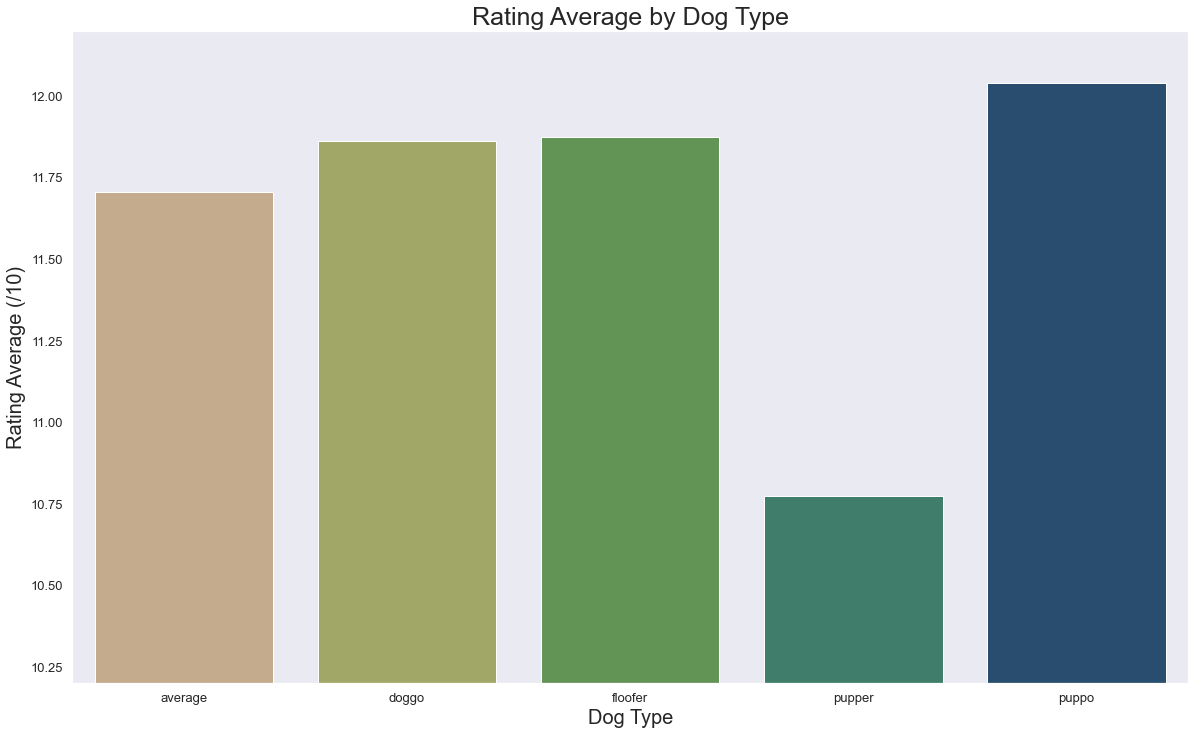

In [52]:
plt.figure(figsize=(20,12))
sns.set_style("dark")
ax = sns.barplot(x="dog_type", y="rating_average", data=dog_type_aggregates, palette='gist_earth_r')
ax.tick_params(labelsize=13)
plt.ylim(10.2, 12.2)
plt.title('Rating Average by Dog Type', fontsize=25)
plt.xlabel('Dog Type', fontsize=20)
plt.ylabel('Rating Average (/10)', fontsize=20)
plt.savefig('rating_avg_dog_type.png', dpi = 300);

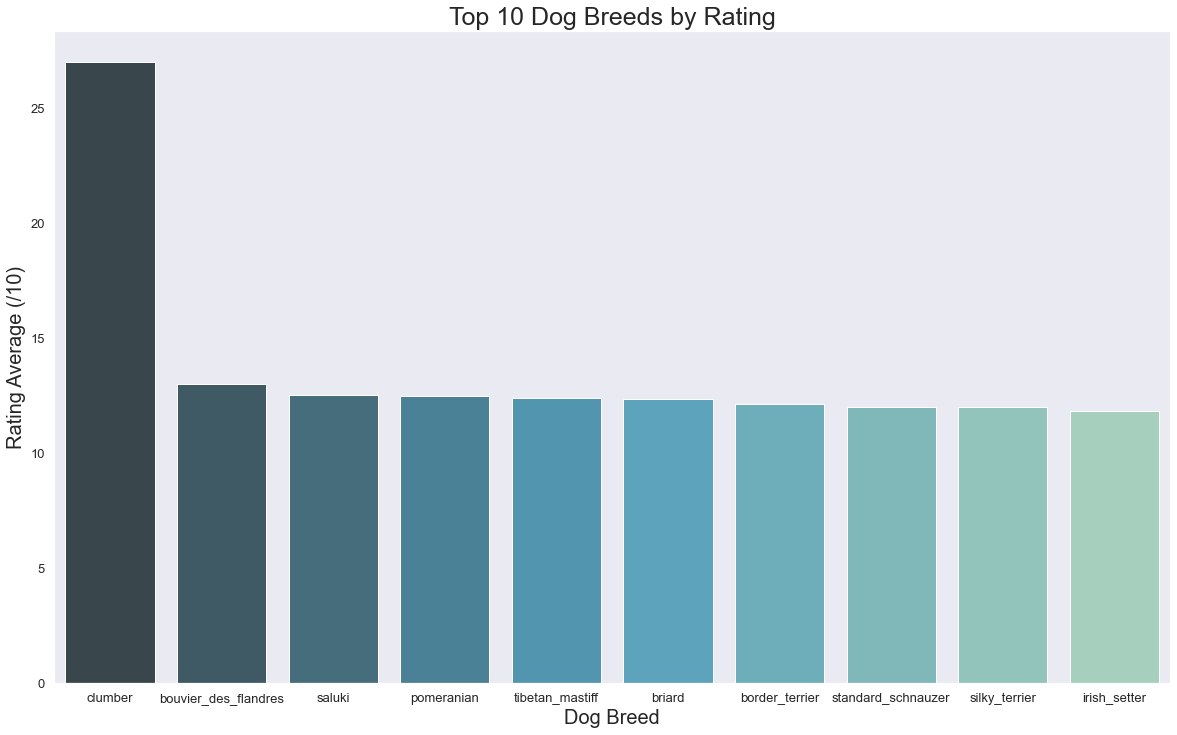

In [53]:
breed_aggregates = twitter_archive_master.groupby('breed')['rating_numerator'].mean().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(20,12))
sns.set_style("dark")
ax = sns.barplot(x="breed", y="rating_numerator", data=breed_aggregates, palette='GnBu_d')
ax.tick_params(labelsize=13)

plt.title('Top 10 Dog Breeds by Rating', fontsize=25)
plt.xlabel('Dog Breed', fontsize=20)
plt.ylabel('Rating Average (/10)', fontsize=20)
plt.savefig('top_rating_avg_dog_breed.png', dpi = 300);

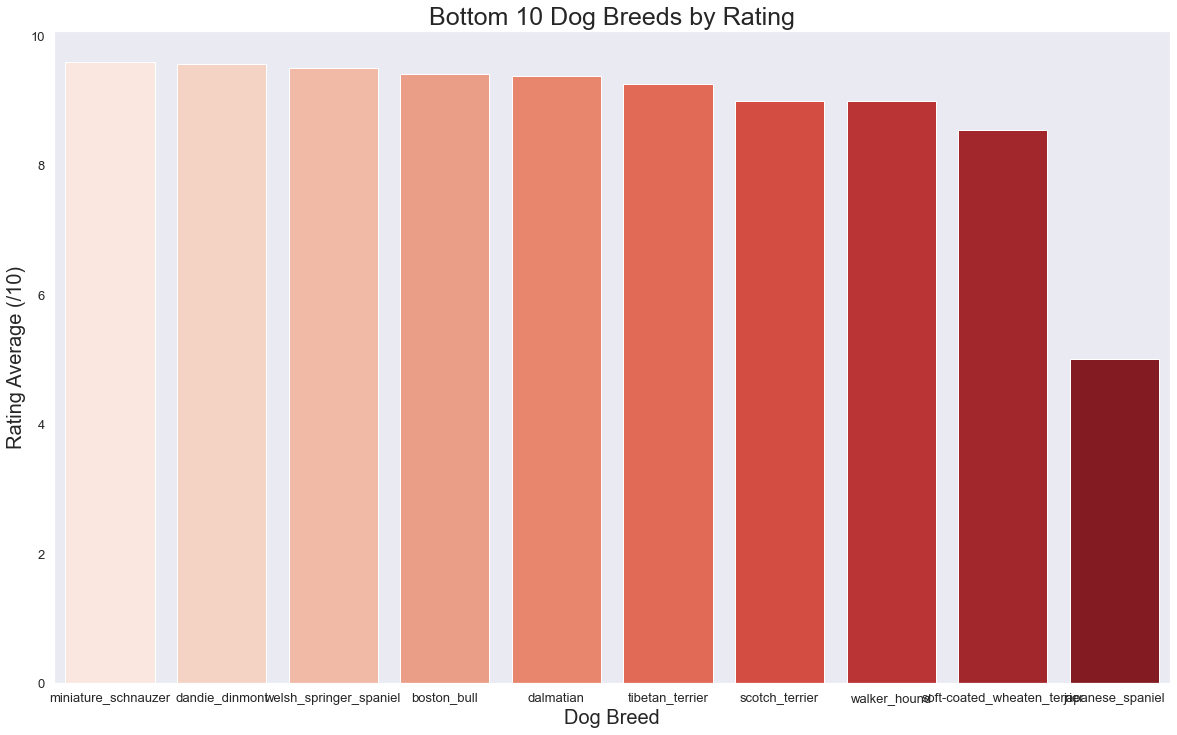

In [54]:
breed_aggregates2 = twitter_archive_master.groupby('breed')['rating_numerator'].mean().sort_values(ascending=False).reset_index().tail(10)

plt.figure(figsize=(20,12))
sns.set_style("dark")
ax = sns.barplot(x="breed", y="rating_numerator", data=breed_aggregates2, palette='Reds')
ax.tick_params(labelsize=13)

plt.title('Bottom 10 Dog Breeds by Rating', fontsize=25)
plt.xlabel('Dog Breed', fontsize=20)
plt.ylabel('Rating Average (/10)', fontsize=20)
plt.savefig('rating_avg_dog_breed.png', dpi = 300);

The three charts above show rating averages. For Dog types Doggo's, Floofer's and Puppo's all have ratings which are very close to the wider average of 11.71. Pupper's in-comparison perform at a far lower average of 10.77. 

The highest rated Dog breed is a Clumber (27) and the lowest performing is unfortunately is a Japanese Spaniel (5).

<a id='interaction'></a>
### Rating and Audience Interaction


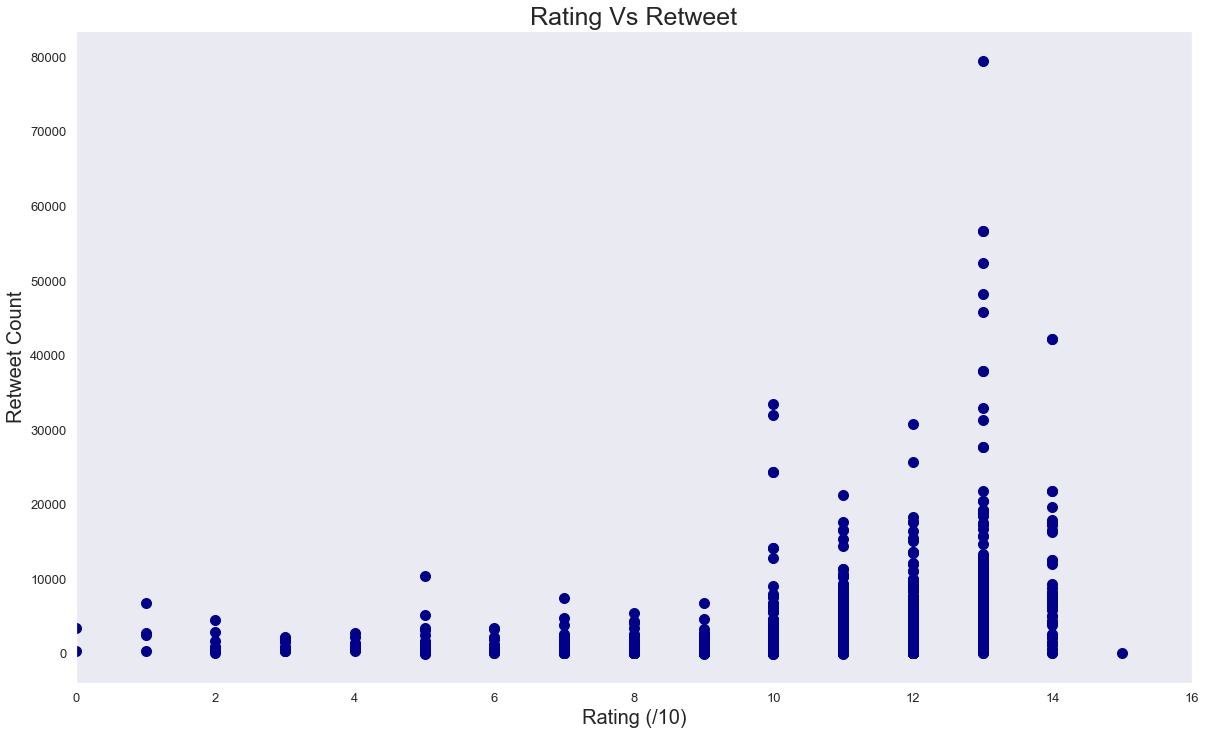

In [59]:
plt.figure(figsize=[20,12])
plt.scatter(x=twitter_archive_master['rating_numerator'], y=twitter_archive_master['retweets'], c='darkblue', s=100)

plt.xlim(0,16)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title('Rating Vs Retweet', fontsize=25)
plt.xlabel('Rating (/10)', fontsize=20)
plt.ylabel('Retweet Count', fontsize=20)

plt.savefig('rating_rt.png', dpi = 300);

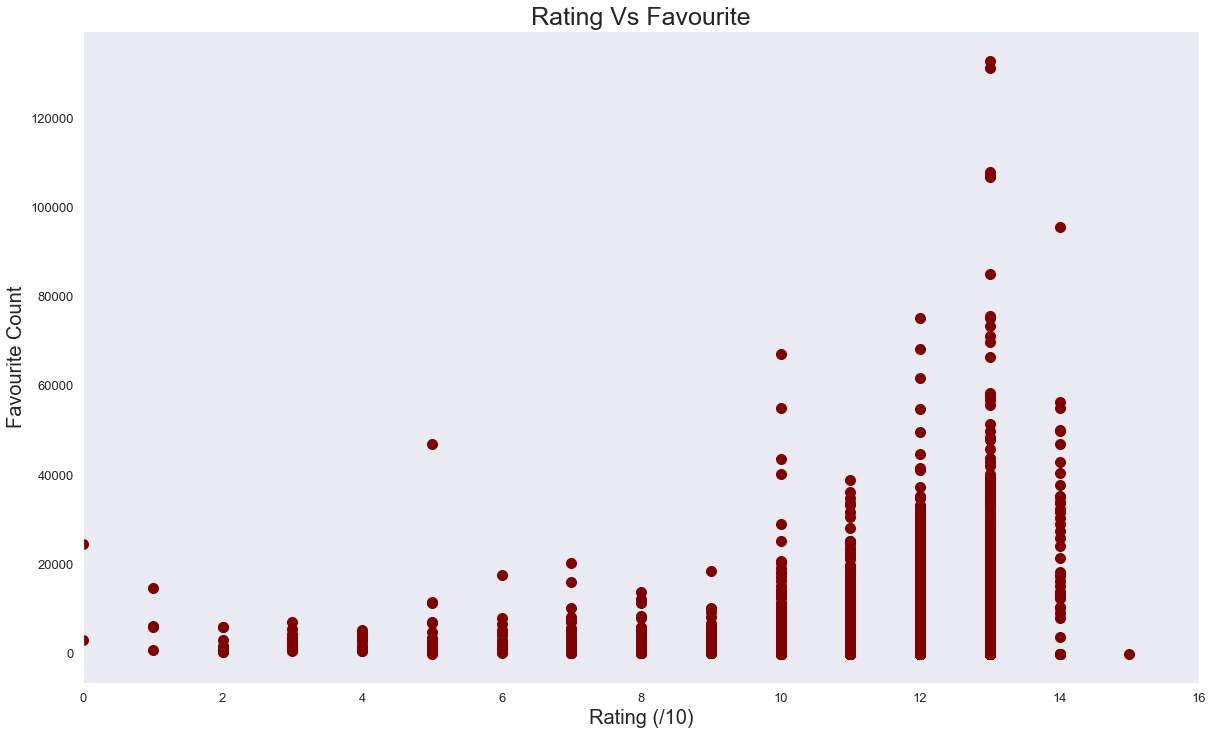

In [60]:
plt.figure(figsize=[20,12])
plt.scatter(x=twitter_archive_master['rating_numerator'], y=twitter_archive_master['favorites'], c='maroon', s=100)

plt.xlim(0,16)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title('Rating Vs Favourite', fontsize=25)
plt.xlabel('Rating (/10)', fontsize=20)
plt.ylabel('Favourite Count', fontsize=20)

plt.savefig('rating_f.png', dpi = 300);

The two scatter-plots show a clear and strongly positive relationship between Dog rating and Reweet/ Favourite count. As rating averages improve, so does the Retweet and Favourite count. 

Therefore, with higher ratings WeRateDogs receieves a greater audience interraction.

# Conclusion
<a id='conclusion'></a>

In answering the question, ***How have ratings trended over time?*** I combined a bar chart for monthly tweet count with a line chart of average rating. The visualisation shows a divergence, as tweet count has reduced, rating average has improved. 

It is interesting to find that rating averages have trended upwards month-to-month. At least in-part this can be explained by follower reactions to highly rated Dogs. In the Analysis section we found that audience interaction improves as ratings imrove. WeRateDogs might therefore be attempting to drive a greater quantity of Retweets and Favourites through awarding higher ratings. Alternatively, perhaps... they're just good Dogs.

***What makes a highly rated Dog?*** - Of course, there are many attributes that make a Dog unique and highly rateable from gender to size! I decided to focus my attention on Dog type, Dog breed and the name of the Dog to understand how these factors might have impacted the rating.

*In terms of quantity...* Golden Retrievers are quite significantly the most tweeted about Dog breed with a massive 169 tweets, while Pupper's contribute a massive 66.4% of all Dog type tweets. Charlie (or Charlie's) is the most tweeted about Dog with 11 tweets. 

*In term of quality...* while Dog type largely appears to be indistinguishable in determining a high rating, Pupper's must be noted for receieving a low average of 10.77 (average rating is 11.71). There are several high performing and low performing Dog breeds which could be mentioned, however the scale is poloarised by a clear Dog breed leader and under-performer. Clumber's have a great rating of 27/10 which is vast in-comparison with Japanese Spaniel's at a 5/10 average.

Perhaps unsurprisingly, WeRateDogs followers love to see highly rated Dogs! From the scatter-plots in the analysis section I found that ***with higher Dog ratings comes a greater level of audience interaction*** in the form of Retweets and Favourites. The level of interaction grows in-line with ratings. This relationship has perhaps been recognised by WeRateDogs themselves. As already mentioned, the average Dog rating has been improving and so too has audience interaction.

# Limitations
<a id='limit'></a>

**Rating Denominator:** When assessing the make-up of the database, I found that there are 23 ratings which do not follow standard convention of having a denominator of 10. These values cannot be fairly used in the wider analysis section, I therefore opted to remove the entries. 

**Image Predictions:** Every image in the WeRateDogs Twitter archive has been run through a neural network that can classify breeds of Dog. The results include up to 3 predictions. When working with this data, I decided to build a new column that selects the highest quality Dog breed prediction. 

The column does not factor in a minimum quality prediction, this should be considered a limitation.

**In-reply/ retweeted columns:** Both columns have very low coverage (78 and 181 rows respectively). A reliable analysis cannot be completed based upon such a low level of data. I therefore decided to remove both columns of data.

# Sources
<a id='source'></a>


1. https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
2. https://www.cyberdefinitions.com/definitions/DOGGO.html
3. https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor
4. https://matplotlib.org/tutorials/colors/colormaps.html
2. https://matplotlib.org/2.0.2/examples/color/named_colors.html
3. https://docs.conda.io/projects/conda/en/latest/user-guide/cheatsheet.html
4. https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html
5. http://empierce.com/

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0